El Dataset elegido es sobre los jugadores del juego de fútbol de EA GAMES conocido como el FIFA24. Los datos que proporciona son sobre las estadísticas de los jugadores, mostrando características específicas de cada uno.

Los datos a los que se hacen mención van desde la nacionalidad, el club en el que juegan, la posición que ocupan en cancha, edad y otras del tipo numérico que marcan la diferencia de habilidades de jugador a jugador, como ser velocidad, precisión de tiro, pases y regate, así como atributos físicos como altura y peso. Con esta información, toda persona puede tomar decisiones de qué jugador prefiere a la hora de armar su equipo.

Además de las estadísticas individuales de los jugadores, también puede analizarse para identificar tendencias en el rendimiento de los jugadores en general. Esto puede incluir análisis entre diferentes habilidades y posiciones de los jugadores, así como comparaciones entre ligas, equipos y nacionalidades.

La disponibilidad de esta información ofrece oportunidades para investigar y analizar diversos aspectos del juego de fútbol virtual, desde la evaluación del rendimiento individual de los jugadores hasta el desarrollo de estrategias y tácticas para lograr la mayor cantidad de partidos ganados en el juego.Con su amplia gama de estadísticas detalladas, podemos soñar con ser parte de un cuerpo técnico de fútbol por un rato, metiendonos en el emocionante mundo táctico y estrategico que ofrece el juego








Existe una relación entre la velocidad y la precisión de tiro de los jugadores en el juego de fútbol de EA Games.

Preguntas a responder:

¿Existe una correlación entre la velocidad y la precisión de tiro de los jugadores?
¿Cómo se distribuye la velocidad y la precisión de tiro entre diferentes posiciones de los jugadores?
¿Hay diferencias significativas en la velocidad y la precisión de tiro entre distintas ligas o equipos?


In [ ]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['all_players.csv']))

print(df.head())

Saving all_players.csv to all_players.csv
   Unnamed: 0             Name     Nation             Club Position  Age  \
0           0    Kylian Mbappé     France         Paris SG       ST   24   
1           1   Erling Haaland     Norway  Manchester City       ST   23   
2           2  Kevin De Bruyne    Belgium  Manchester City       CM   32   
3           3     Lionel Messi  Argentina   Inter Miami CF       CF   36   
4           4    Karim Benzema     France       Al Ittihad       CF   35   

   Overall  Pace  Shooting  Passing  ...  Strength  Aggression  Att work rate  \
0       91    97        90       80  ...        77          64           High   
1       91    89        93       66  ...        93          87           High   
2       91    72        88       94  ...        74          75           High   
3       90    80        87       90  ...        68          44            Low   
4       90    79        88       83  ...        82          63         Medium   

   Def work ra

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Name', 'Nation', 'Club', 'Position', 'Age', 'Overall',
       'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality',
       'Acceleration', 'Sprint', 'Positioning', 'Finishing', 'Shot', 'Long',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free', 'Curve',
       'Agility', 'Balance', 'Reactions', 'Ball', 'Composure', 'Interceptions',
       'Heading', 'Def', 'Standing', 'Sliding', 'Jumping', 'Stamina',
       'Strength', 'Aggression', 'Att work rate', 'Def work rate',
       'Preferred foot', 'Weak foot', 'Skill moves', 'URL', 'Gender', 'GK'],
      dtype='object')


Preguntas a responder:

1- ¿Cómo varía la calificación general de los jugadores en función de su edad y posición?

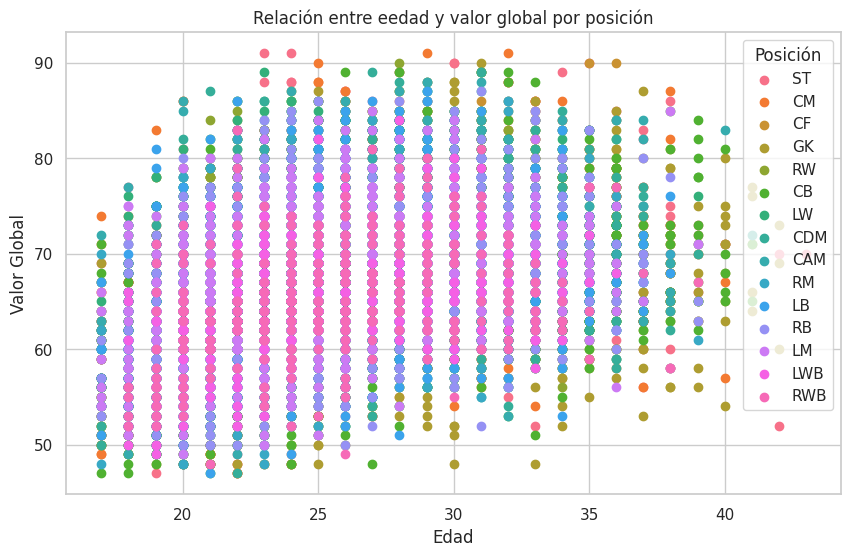

In [ ]:

palette = sns.color_palette('husl', len(df['Position'].unique()))


plt.figure(figsize=(10, 6))
positions = df['Position'].unique()
for i, pos in enumerate(positions):
    data = df[df['Position'] == pos]
    plt.scatter(data['Age'], data['Overall'], color=palette[i], label=pos)
plt.xlabel('Edad')
plt.ylabel('Valor Global')
plt.title('Relación entre eedad y valor global por posición')
plt.legend(title='Posición')
plt.grid(True)
plt.show()

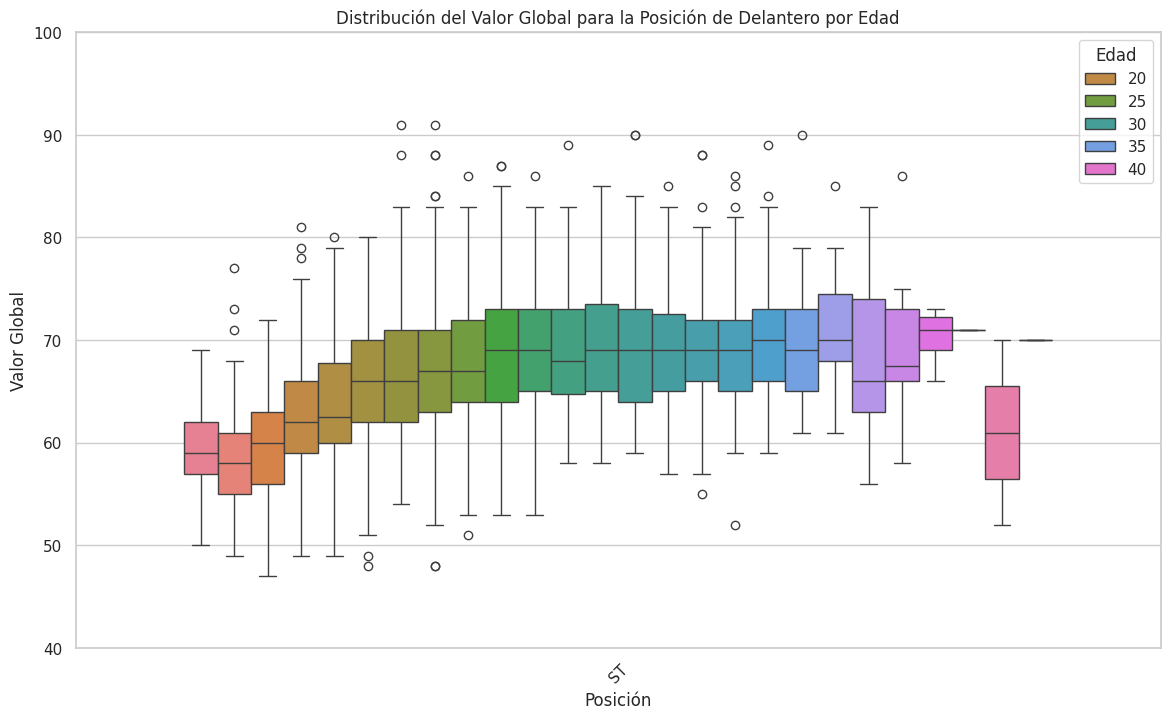

In [ ]:
#Dado que la posición ST es la que mejores resultados arrojo voy a graficar con seabron la relación de valoración general, edad y posición = "ST"
df_st = df[df['Position'] == 'ST']


sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.boxplot(x='Position', y='Overall', hue='Age', data=df_st, palette='husl')  # Usar la paleta 'husl'
plt.title('Distribución del Valor Global para la Posición de Delantero por Edad')
plt.xlabel('Posición')
plt.ylabel('Valor Global')
plt.legend(title='Edad')
plt.xticks(rotation=45)
plt.ylim(40, 100)
plt.show()

Como primer aproximación a los datos vemos notablemente que en la Position ST se encuentran los jugadores con mejor puntuación general (overall) y el rango etario en el cual están en su top va desde los 23 hasta los 30 años.

2-¿Cuál es el perfil predominante de los jugadores más valorados en términos de edad y posición, será el derecho o el izquierdo?

<Figure size 1000x600 with 0 Axes>

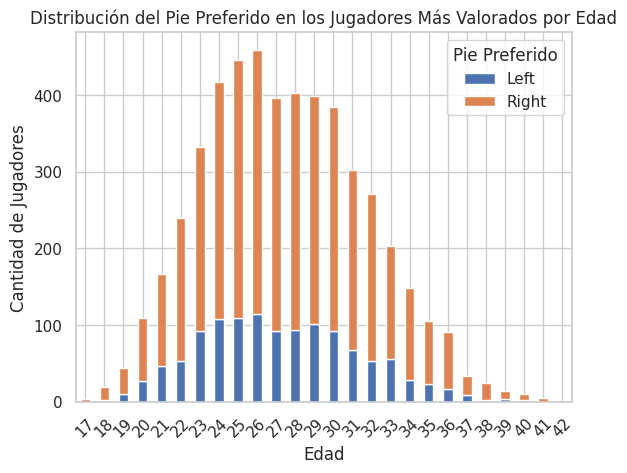

In [ ]:
top_players = df[df['Overall'] >= df['Overall'].quantile(0.75)]
counts = top_players.groupby(['Age', 'Preferred foot']).size().unstack()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', stacked=True)
plt.title('Distribución del Pie Preferido en los Jugadores Más Valorados por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Jugadores')
plt.legend(title='Pie Preferido')
plt.xticks(rotation=45)
plt.show()

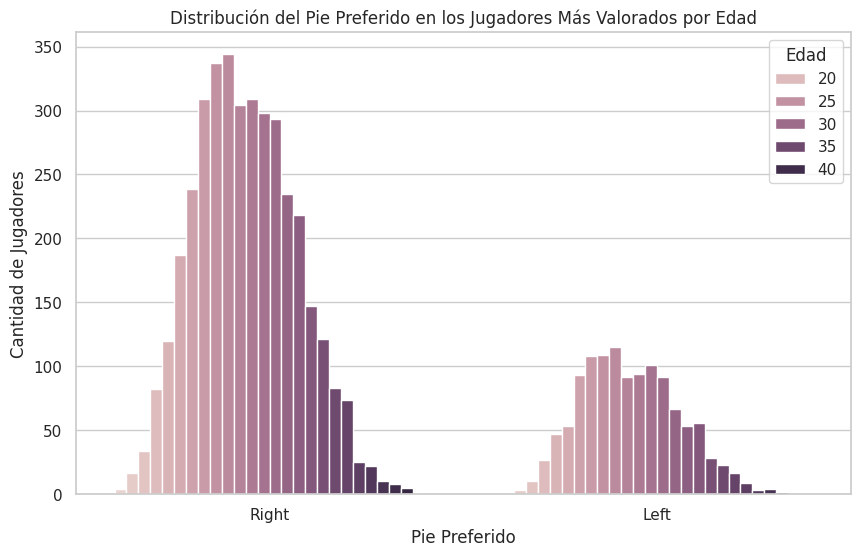

In [ ]:

top_players = df[df['Overall'] >= df['Overall'].quantile(0.75)]

plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred foot', hue='Age', data=top_players)
plt.title('Distribución del Pie Preferido en los Jugadores Más Valorados por Edad')
plt.xlabel('Pie Preferido')
plt.ylabel('Cantidad de Jugadores')
plt.legend(title='Edad')
plt.show()

Se puede ver como los jugadores son en su gran mayoria derechos por encima de los zurdos.

3- ¿Qué nacionalidades son las que tienen mayor cantidad de jugadores?

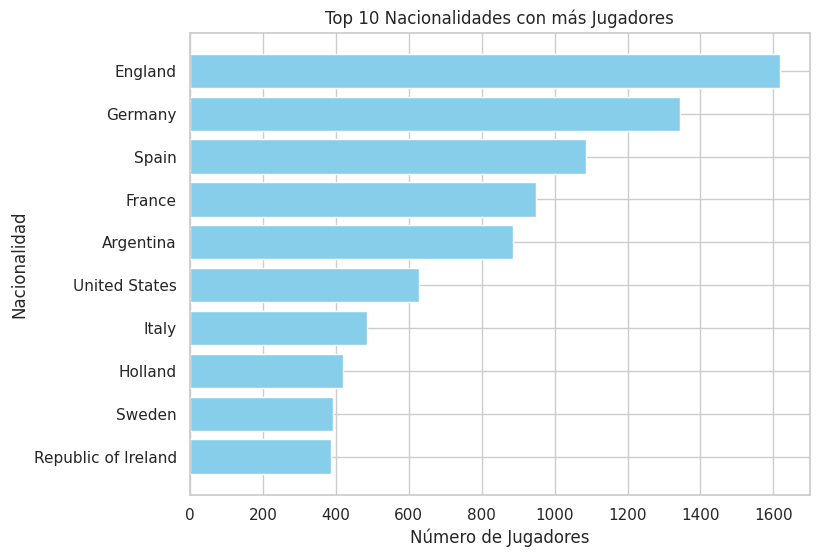

In [ ]:

nationality_counts = df['Nation'].value_counts().head(10)


plt.figure(figsize=(8, 6))
plt.barh(nationality_counts.index, nationality_counts.values, color='skyblue')
plt.title('Top 10 Nacionalidades con más Jugadores')
plt.xlabel('Número de Jugadores')
plt.ylabel('Nacionalidad')
plt.gca().invert_yaxis()
plt.show()

<ipython-input-26-805495ed39ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')


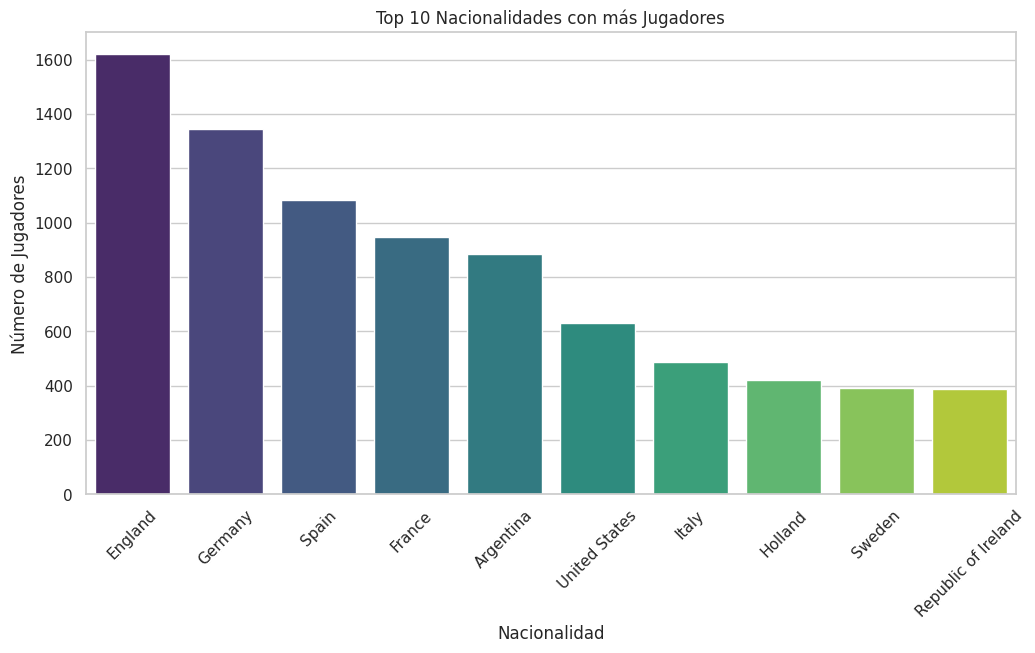

In [ ]:

nationality_counts = df['Nation'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')
plt.title('Top 10 Nacionalidades con más Jugadores')
plt.xlabel('Nacionalidad')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=45)
plt.show()

La Nacionalidad con mayor cantidad de jugadores es Inglaterra con mas de 1600 jugadores en el juego, a simple vista la mayoria de los jugadores se ubican en Europa dado que los principales puestos los ubican Alemania, España y Francia.

In [ ]:
#Para poder trabajar el dataset tuve que tomar una muestra de mil filas dado que sino la RAM a utilizar en colab no me lo permitía analizar:
sample_size = 500

# luego seleccione aleatoriamente una muestra
sample_df = df.sample(n=sample_size, random_state=42)
from sklearn.impute import SimpleImputer

# Dado que los nombres no me los tomaba encontré la solución con variables dummy
X_encoded = pd.get_dummies(sample_df)
print(X_encoded.head())

#Tome como vairable objetivo Overall es decir las habilidades generales de los jugadores
y = sample_df['Overall']
X = X_encoded.drop(columns=['Overall'])

# Tuve que imputar algunos datos con el promedio de la columna dado la falta de algunos
imputer = SimpleImputer(strategy='mean')
X_encoded_imputed = imputer.fit_transform(X)

print(X_encoded_imputed[:5])



       Unnamed: 0  Age  Overall  Pace  Shooting  Passing  Dribbling  \
9910         9910   20       64    81        52       56         74   
5502         5502   23       69    66        29       43         39   
13576       13576   21       60    63        54       61         61   
6848         6848   34       67    57        38       61         58   
8217         8217   25       66    79        60       61         64   

       Defending  Physicality  Acceleration  ...  \
9910          31           56            84  ...   
5502          70           71            63  ...   
13576         50           43            66  ...   
6848          66           64            58  ...   
8217          60           77            78  ...   

       URL_https://www.ea.com/games/ea-sports-fc/ratings/player-ratings/yeison-suarez/274113  \
9910                                               False                                       
5502                                               False            

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.impute import SimpleImputer

X = df.drop(columns=['Overall'])
y = df['Overall']

# Filtrar solo características numéricas
X_numeric = X.select_dtypes(include=['number'])

# Impute valores que faltban nuevamente dado que no me tomaba el X_IMPUTED en este código a pesar q ya estaba arriba
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Seleccino características con metodo Wrapper
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)  # Selecciona 5 características
rfe.fit(X_imputed, y)

# Hago print de las mismas
selected_features = pd.DataFrame(rfe.support_, index=X_numeric.columns, columns=['Selected'])
print("Características seleccionadas:")
print(selected_features[selected_features['Selected'] == True].index)

Características seleccionadas:
Index(['Passing', 'Reactions', 'Jumping', 'Skill moves', 'GK'], dtype='object')


<ipython-input-6-92d13086e078>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Overall'] = y


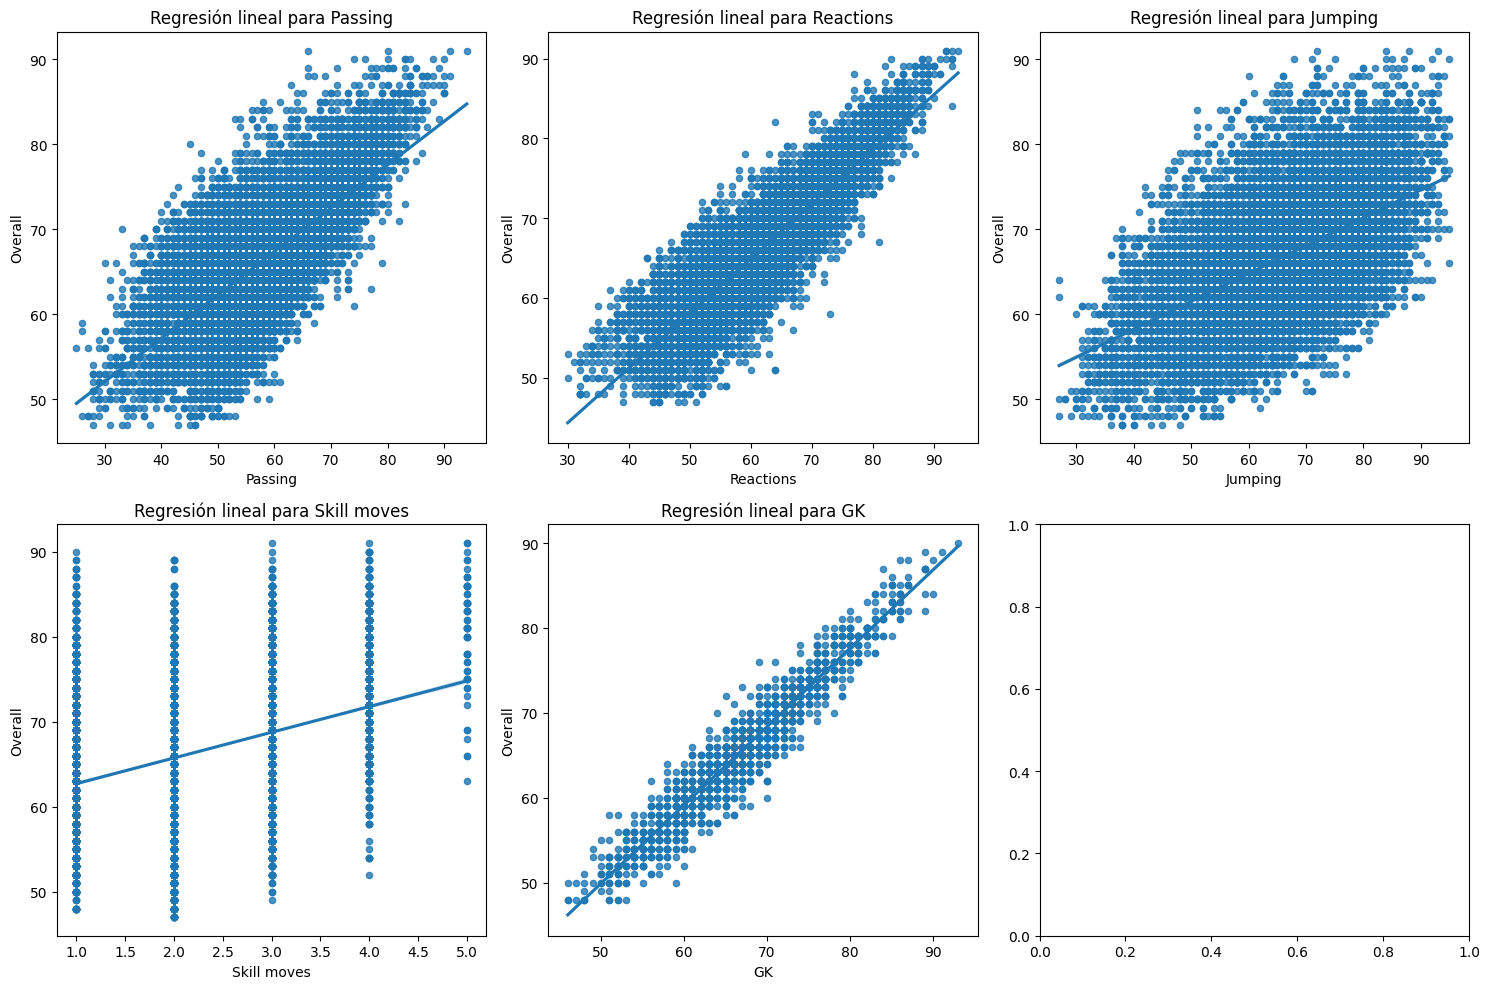

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame solo con las características seleccionadas
selected_columns = selected_features[selected_features['Selected']].index.tolist()
df_selected = X_numeric[selected_columns]

# Agregar la variable objetivo 'Overall' al DataFrame seleccionado
df_selected['Overall'] = y

# Graficar la regresión lineal para cada característica seleccionada
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(selected_columns):  # Iterar sobre todas las características seleccionadas
    row = i // 3
    col = i % 3
    sns.regplot(x=feature, y='Overall', data=df_selected, ax=axs[row, col], scatter_kws={'alpha':0.8, 's': 20})
    axs[row, col].set_title(f'Regresión lineal para {feature}')

plt.tight_layout()
plt.show()

Para analizar las graficas de la regresión lineal podemos observar varios factores:

1- Empzando con la pendiente podemos visualizar que para los casos de las habilidades "Passing" y "Reactions" la relación con las habilidades generales de los jugadores van de la mano, es decir a mayor overall mejor pasará la pelota el jugador y mayor reacción tendrá en el juego, esto se ve muy notorio cuando los jugadores pasan por encima de 70 puntos de overall. En los casos de Jumping y Skills moves no existe una buena relación entre el overall y las habilidades seleccionadas, tanto es asi que podemos encontrar jugadores con muy poca habilidad general y muchisima habilidad de salto o viceverza. Por último el caso de GK que es la habilidad del goalkeaper era sabido que la pendiente iba a acompañar el analisis, a mayor overall mayor habilidad de GK dado que es la habilidad que define si el arquero es bueno o no.

2- Para los casos de Passing, Reactions y GK vemos una fuerza de relación fuerte dado que la pendiente acompaña el crecimiento de la habilidad, cosa que para Skiss moves y jumping la relación es muy debil dado que un aumento considerable en el overall no me da indicios de aumentos de las habilidades.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['Overall'])
y = df['Overall']  # Variable objetivo

X_numeric = X.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_imputed, y)
X_selected = rfe.transform(X_imputed)

# Dividí los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entreno el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Hago predicciones sobre el conjunto de prueba
y_pred = regression_model.predict(X_test)

# Calculo metricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Y las imprimo
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 6.71790124895398
Coeficiente de determinación (R^2): 0.8618915195705239


1- El modelo comete un error cuadrático medio de alrededor de 6,72 en la predicción de la variable objetivo Overall
2- El valor de R^2 es aproximadamente 0.862, lo que indica que el modelo explica alrededor del 86.2% de la variabilidad en la variable objetivo
Los resultados sugieren que el modelo de regresión lineal entrenado con las características seleccionadas tiene un buen rendimiento en la predicción de la variable objetivo 'Overall', con un bajo error cuadrático medio y un coeficiente de determinación significativamente alto.